In [1]:
from google.colab import files
uploaded = files.upload()


Saving dataset1.xlsx to dataset1.xlsx


In [2]:
!pip install pandas matplotlib seaborn


In [3]:
import pandas as pd

# Replace with the file name
file_path = "/content/dataset1.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows
data.head()


,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
0,brenbr359,Brent Brown,Product Manager,Product Manager Interview Transcript\n\nInterv...,Here's a sample resume for Brent Brown applyin...,select,Experience,We are looking for a skilled Product Manager w...
1,jameay305,James Ayala,Software Engineer,Software Engineer Interview Transcript\n\nInte...,Here's a sample resume for James Ayala applyin...,select,Experience,We are looking for a skilled Software Engineer...
2,scotri565,Scott Rivera,Data Engineer,Here is a simulated interview for Scott Rivera...,Here's a sample resume for Scott Rivera applyi...,reject,Experience,We are looking for a skilled Data Engineer wit...
3,emilke232,Emily Kelly,UI Engineer,Interview Transcript: Emily Kelly for UI Engin...,Here's a sample resume for Emily Kelly:\n\nEmi...,select,Experience,We are looking for a skilled UI Engineer with ...
4,ashlra638,Ashley Ray,Data Scientist,Data Scientist Interview Transcript\n\nCompany...,Here's a sample resume for Ashley Ray applying...,reject,Cultural Fit,We are looking for a skilled Data Scientist wi...


In [4]:
# Check column names, types, and missing values
data.info()

# Check basic statistics of numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   500 non-null    object
 1   Name                 500 non-null    object
 2   Role                 500 non-null    object
 3   Transcript           500 non-null    object
 4   Resume               500 non-null    object
 5   decision             500 non-null    object
 6   Reason for decision  500 non-null    object
 7   Job Description      500 non-null    object
dtypes: object(8)
memory usage: 31.4+ KB


,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
count,500,500,500,500,500,500,500,500
unique,500,497,5,500,500,2,4,443
top,brenbr359,Mark Gilbert,Software Engineer,Product Manager Interview Transcript\n\nInterv...,Here's a sample resume for Brent Brown applyin...,select,Experience,We are looking for a skilled UI Engineer with ...
freq,1,2,108,1,1,255,139,3


In [5]:
# Check for missing values
print(data.isnull().sum())

# Fill missing numerical values with mean
numeric_cols = data.select_dtypes(include=['number']).columns  # Select only numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing categorical values with mode
for col in data.select_dtypes(include=['object']).columns:  # Iterate over categorical columns
    data[col].fillna(data[col].mode()[0], inplace=True)


ID                     0
Name                   0
Role                   0
Transcript             0
Resume                 0
decision               0
Reason for decision    0
Job Description        0
dtype: int64


<ipython-input-5-1a8508818f5e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [6]:
# One-Hot Encoding for categorical features
data = pd.get_dummies(data, drop_first=True)


In [7]:
# Step 1: Inspect the DataFrame
print(data.info())  # Check the structure of the DataFrame
print(data.head())

# Step 2: Convert all columns to numeric (if necessary)
data = data.apply(pd.to_numeric, errors='coerce')

# Step 3: Re-identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(f"Numerical columns identified: {numerical_columns}")

# Step 4: Handle missing values
if not numerical_columns.empty:
    data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

    # Step 5: Apply MinMaxScaler
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    print("\nScaled numerical columns:")
    print(data[numerical_columns].head())
else:
    print("No numerical columns found for scaling.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 2443 entries, ID_aarota849 to Job Description_We are looking for a skilled UI Engineer with expertise in Wireframing, UI/UX Design, React, JavaScript.
dtypes: bool(2443)
memory usage: 1.2 MB
None
   ID_aarota849  ID_adamva326  ID_adamwi542  ID_adrisa378  ID_alanto439  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

   ID_alexco222  ID_alexda889  ID_alexto726  ID_alisco626  ID_allesm791  ...  \
0         False         False         False         False         False  ...   
1         False         False         False         False         False  ...   
2         False         False   

In [8]:
# Check the shape of the dataset
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")


Number of rows: 500
Number of columns: 2443


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


Data types before conversion:
 ID                     object
Name                   object
Role                   object
Transcript             object
Resume                 object
decision               object
Reason for decision    object
Job Description        object
dtype: object
Data types after conversion:
 ID                     float64
Name                   float64
Role                   float64
Transcript             float64
Resume                 float64
decision               float64
Reason for decision    float64
Job Description        float64
dtype: object
Correlation Matrix Shape: (8, 8)


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


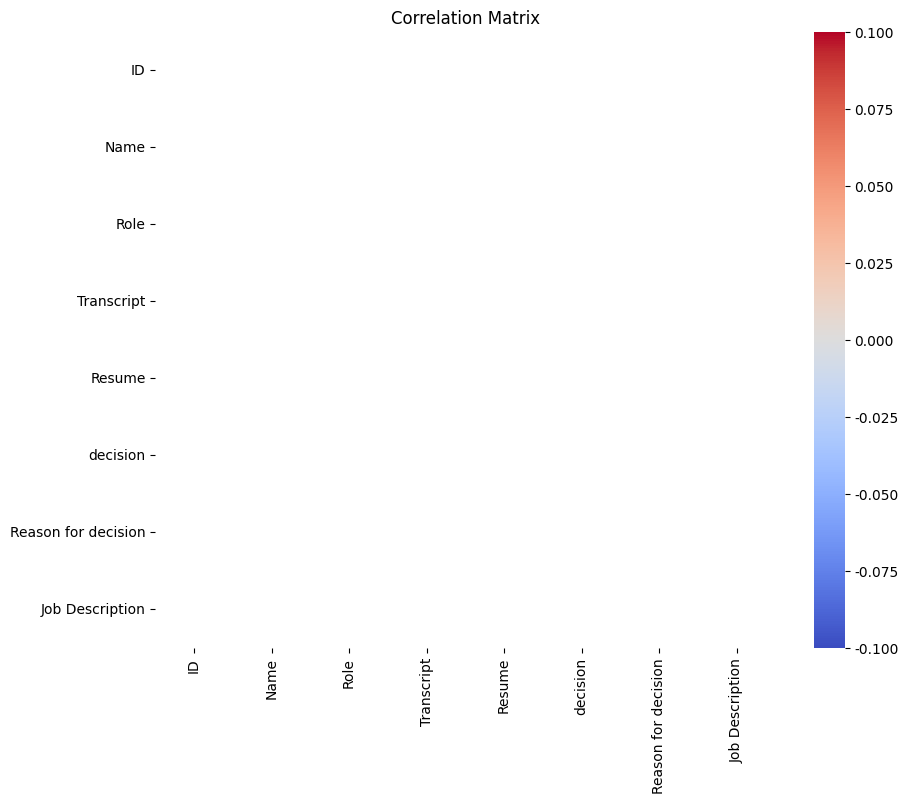

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Load the dataset (update file path as needed)
data = pd.read_excel('/content/dataset1.xlsx')

# Inspect data types and check for non-numeric columns
print("Data types before conversion:\n", data.dtypes)

# Drop rows with missing values
data = data.dropna()

# Try to convert all columns to numeric, if possible
data = data.apply(pd.to_numeric, errors='coerce')

# Check the data types again
print("Data types after conversion:\n", data.dtypes)

# Select only numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Check if there are numeric columns
if data_numeric.empty:
    print("Error: No numeric columns found in the dataset!")
else:
    # Compute the correlation matrix
    corr_matrix = data_numeric.corr()
    print("Correlation Matrix Shape:", corr_matrix.shape)

    # Plot the heatmap
    rcParams['font.family'] = 'DejaVu Sans'
    rcParams['axes.unicode_minus'] = False

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()


In [11]:
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    sns.countplot(data[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


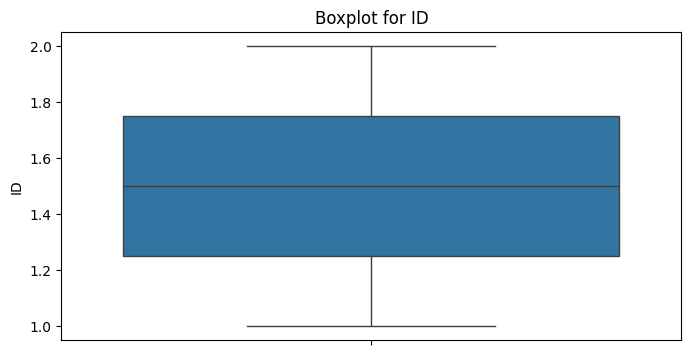

In [81]:
 # insight
 import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 categories in a categorical column
if 'category_column' in data.columns:
    print("Top 5 categories:")
    print(data['category_column'].value_counts().head(5))

# Mean value of a numerical column grouped by a category
if 'category_column' in data.columns and 'numerical_column' in data.columns:
    print("Mean values grouped by category:")
    print(data.groupby('category_column')['numerical_column'].mean())

# Outliers detection in numerical columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))  # Specify the size of the plot
    sns.boxplot(data[column])  # Create the boxplot
    plt.title(f"Boxplot for {column}")  # Add a title
    plt.show()  # Explicitly call show to display the plot


In [14]:
# Display the top 5 categories in a categorical column
if 'category_column' in data.columns:
    print("Top 5 categories:")
    print(data['category_column'].value_counts().head(5))

# Mean value of a numerical column grouped by a category
if 'category_column' in data.columns and 'numerical_column' in data.columns:
    print("Mean values grouped by category:")
    print(data.groupby('category_column')['numerical_column'].mean())


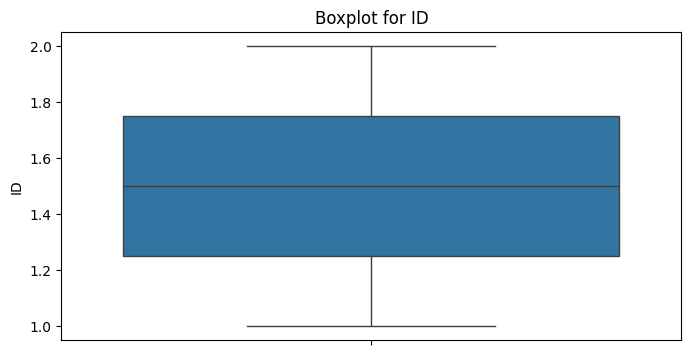

In [82]:
# Boxplot for detecting outliers in numerical columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()


In [59]:
# Replace NaN values with an empty string
X_combined = X_combined.fillna('')
y = y.fillna('Unknown')  # Replace NaN in y if necessary

In [60]:
# Filter out rows where combined text is empty or just spaces
valid_indices = X_combined[X_combined.str.strip().ne('')].index
X_combined = X_combined[valid_indices]
y = y[valid_indices]




In [61]:
# Ensure there are non-empty text entries
if X_combined.str.strip().ne('').sum() == 0:
    raise ValueError("After filtering, no valid text data available for TF-IDF conversion.")

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Example dataset (replace this with your actual dataset)


# Step 1: Combine the 'Transcript', 'Resume', and 'Job Description' columns
X_combined = data['Transcript'] + ' ' + data['Resume'] + ' ' + data['Job Description']

# Replace NaN values with an empty string
X_combined = X_combined.fillna('')
y = data['decision'].fillna('Unknown')

# Filter out rows where combined text is empty or just spaces
valid_indices = X_combined[X_combined.str.strip().ne('')].index
X_combined = X_combined[valid_indices]
y = y[valid_indices]

print(f"Length of X_combined after filtering: {X_combined.shape}")
print(f"Length of y after filtering: {y.shape}")

# Ensure there are non-empty text entries
if X_combined.str.strip().ne('').sum() == 0:
    raise ValueError("After filtering, no valid text data available for TF-IDF conversion.")

# Step 3: Apply TF-IDF Vectorizer to the text data
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(X_combined)

# Step 4: Train-test split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrain and test split sizes: X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

Length of X_combined after filtering: (2,)
Length of y after filtering: (2,)

Train and test split sizes: X_train: (1, 8), X_test: (1, 8), y_train: (1,), y_test: (1,)


In [84]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder



# Combine the text data and prepare the target variable
X_combined = data['Transcript'] + ' ' + data['Resume'] + ' ' + data['Job Description']
X_combined = X_combined.fillna('')
y = data['decision'].fillna('Unknown')

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Convert 'Accepted' to 1, 'Unknown' to 0, etc.

# Check the class distribution of the target variable
print("Class distribution of the target variable (y):")
print(pd.Series(y).value_counts())

# Apply TF-IDF Vectorizer to the text data
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(X_combined)

# Check the size of the dataset after filtering
print(f"Size of the dataset after filtering: {len(X_combined)}")

# If the dataset is too small (less than 2 classes or very small size), handle it accordingly
if len(X_combined) <= 1 or len(set(y)) < 2:
    print("Dataset is too small or contains only one class for training a model.")
else:
    # Models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(n_estimators=100)
    }

    for model_name, model in models.items():
        print(f"Tuning {model_name}...")

        try:
            # Train on the entire dataset without splitting (because of small size)
            model.fit(X, y)

            # Predict and evaluate
            y_pred = model.predict(X)
            accuracy = accuracy_score(y, y_pred)
            roc_auc = roc_auc_score(y, model.predict_proba(X)[:, 1])

            # Display results
            print(f"Accuracy for {model_name}: {accuracy:.4f}")
            print(f"ROC AUC Score for {model_name}: {roc_auc:.4f}")

        except Exception as e:
            print(f"Error occurred while tuning {model_name}: {e}")


Class distribution of the target variable (y):
1    1
0    1
Name: count, dtype: int64
Size of the dataset after filtering: 2
Tuning Logistic Regression...
Accuracy for Logistic Regression: 1.0000
ROC AUC Score for Logistic Regression: 1.0000
Tuning Decision Tree...
Accuracy for Decision Tree: 1.0000
ROC AUC Score for Decision Tree: 1.0000
Tuning Random Forest...
Accuracy for Random Forest: 1.0000
ROC AUC Score for Random Forest: 1.0000
